## 선형 회귀(Linear Regression)
오차가 가장 작은 직선을 구하는 문제<br>

In [1]:
import numpy as np                                     # 넘파이 패키지
import pandas as pd                                    # 판다스 패키지
import tensorflow as tf                                # 인공지능 패키지
import matplotlib.pyplot as plt                        # 그래프 패키지
from sklearn.model_selection import train_test_split   # 데이터 셋 분할

from sklearn.linear_model import LinearRegression      # 선형 회귀 패키지
from sklearn.linear_model import Ridge                 # 릿지 선형 회귀 패키지
from sklearn.preprocessing import PolynomialFeatures   # 특성 변환기 패키지

from keras.models import Sequential, Model
from keras.layers import Dense
from keras import optimizers

from sklearn.metrics import mean_absolute_error        # 평균 절대값 에러(모델 평가 지수)
from sklearn.metrics import mean_squared_error         # 평균 제곱근 에러(모델 평가 지수)

In [2]:
# 코랩과 구굴 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')   # content는 내 드라이브 디렉토리입니다.

Mounted at /content/drive


In [4]:
# 데이터 셋 불러오기
# /content/drive/MyDrive/Colab Notebooks/midterm/data/mokpo_data.csv
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/midterm/data/mokpo_data.csv')
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30624 entries, 0 to 30623
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기온      30624 non-null  float64
 1   풍속      30624 non-null  float64
 2   습도      30624 non-null  int64  
 3   기압      30624 non-null  float64
 4   일조      30624 non-null  float64
 5   일사      30624 non-null  float64
 6   전운량     30624 non-null  int64  
 7   발전량     30624 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 1.9 MB
None
    기온   풍속  습도      기압   일조  일사   전운량  발전량
0 -3.6  1.9  66  1027.7  0.0  0.0    9  0.0
1 -4.4  2.3  66  1027.6  0.0  0.0    6  0.0
2 -4.1  2.1  65  1028.1  0.0  0.0    9  0.0
3 -4.0  1.1  63  1028.0  0.0  0.0    9  0.0
4 -4.2  1.3  63  1027.5  0.0  0.0    9  0.0


In [5]:
data = np.array(data)          # 데이터 프레임을 배열로 변환

# 정규화 : 각 열 단위로 0 부터 1롤 변환
data = (data - np.min(data, 0)) / (np.max(data, 0) - np.min(data, 0))
print(data.shape)              # 데이터 스케일 보기
print(data[0 : 5])

(30624, 8)
[[0.1991342  0.08920188 0.61363636 0.89668616 0.         0.
  0.9        0.        ]
 [0.18181818 0.10798122 0.61363636 0.89473684 0.         0.
  0.6        0.        ]
 [0.18831169 0.09859155 0.60227273 0.90448343 0.         0.
  0.9        0.        ]
 [0.19047619 0.05164319 0.57954545 0.90253411 0.         0.
  0.9        0.        ]
 [0.18614719 0.06103286 0.57954545 0.89278752 0.         0.
  0.9        0.        ]]


In [7]:
# 데이터 만들기 주의 해서 학습하세요
# 데이터셋 만들기(주의 : 다음 시간 예측입니다)
# 두시간 후의 예측은 어떻게 슬라이싱 할까요?
x_data = data[ : -1, : ]             # 입력 데이터(마지막 샘플 전까지)
y_data = data[1 : , -1]              # 타겟 데이터(다음날 부터 마지막 샘플까지)
print(x_data.shape)
print(y_data.shape)
print(y_data[:5])

print(len(data) * 0.8)         # 데이터 나누기 위해서

(30623, 8)
(30623,)
[0. 0. 0. 0. 0.]
24499.2


In [8]:
# 데이터 셋 만들기
x_train = x_data[ : 24499 ,  : ]         # 학습 데이터
y_train = y_data[ : 24499]

x_test = x_data[24499 : ,  : ]          # 테스트 데이터
y_test = y_data[24499 :]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(24499, 8)
(24499,)
(6124, 8)
(6124,)


<h3>다중회귀(multiple regression)</h3>
*   여러 개의 특성을 이용한 선형회귀<br>
*   선형 회귀 방정식<br>
*   타깃 = a × (특성1) + b × (특성2) + ..... + 절편

In [9]:
# 학습할 수 있는 모델을 만듬
lr = LinearRegression()                     # 선형 회귀 모델
lr.fit(x_train, y_train)                    # 모델 훈련

print(lr.score(x_train, y_train))           # 훈련 셋 평가
print(lr.score(x_test, y_test))             # 테스트 셋 평가

0.8794741049746468
0.8716889678746736


In [10]:
# 테스트 세트에 대한 예측 값
test_prediction = lr.predict(x_test)

# 테스트 세트에 대한 평균 절댓값 오차
mae = mean_absolute_error(y_test, test_prediction)
mse = mean_squared_error(y_test, test_prediction)
rmse = mse**0.5
print("MAE  : ", mae)
print("MSE  : ", mse)
print("RMSE  : ", rmse)

MAE  :  0.05590270487128472
MSE  :  0.008161603057721883
RMSE  :  0.0903415909629772


## 특성 공학
기존 특성을 이용해 새로운 특성을 생성<br>
degree=2

In [11]:
poly = PolynomialFeatures(include_bias=False)          # 특성 변환기 객체(절편 없앰)

poly.fit(x_train)                                      # 8개의 특성을 이용하여 특성을 늘리는 학습

train_poly = poly.transform(x_train)                   # 여기서 훈련 셋 특성 변함
test_poly = poly.transform(x_test)                     # 테스트 셋 특성 변환

poly.get_feature_names_out()                           # 변환 특성 확인
print(train_poly.shape)                                # 특성 변환 스케알

(24499, 44)


In [13]:
lr = LinearRegression()                              # 선형 회귀 모델
lr.fit(train_poly, y_train)                    # 모델 훈련
print(lr.score(train_poly, y_train))           # 훈련 셋 평가
print(lr.score(test_poly, y_test))             # 테스트 셋 평가

0.8969992717449276
0.8927687236177932


In [14]:
# 테스트 세트에 대한 예측 값
test_prediction = lr.predict(test_poly)
# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다
mae = mean_absolute_error(y_test, test_prediction)
mse = mean_squared_error(y_test, test_prediction)
rmse = mse**0.5
print("MAE  : ", mae)
print("MSE  : ", mse)
print("RMSE : ", rmse)

MAE  :  0.04777431921468522
MSE  :  0.006820762787954337
RMSE :  0.0825879094538319


degree=5

In [15]:
poly = PolynomialFeatures(degree=5, include_bias=False)   # 특성 변환기 모델
poly.fit(x_train)                                  # 3개의 특성을 이용하여 특성을 늘리는 학습

train_poly = poly.transform(x_train)               # 여기서 훈련 셋 특성 변함
test_poly = poly.transform(x_test)                 # 테스트 셋도 훈련셋과 동일하게 특성 해야 함

poly.get_feature_names_out()                           # 변환 특성 확인
print(train_poly.shape)                                # 특성 변환 스케알

(24499, 1286)


In [16]:
lr = LinearRegression()                              # 선형 회귀 모델
lr.fit(train_poly, y_train)                          # 모델 훈련
print(lr.score(train_poly, y_train))                 # 훈련 셋 평가
print(lr.score(test_poly, y_test))                   # 테스트 셋 평가

0.9247809189180961
0.8586134747887589


In [17]:
# 테스트 세트에 대한 예측 값
test_prediction = lr.predict(test_poly)
# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다
mae = mean_absolute_error(y_test, test_prediction)
mse = mean_squared_error(y_test, test_prediction)
rmse = mse**0.5
print("MAE  : ", mae)
print("MSE  : ", mse)
print("RMSE : ", rmse)

MAE  :  0.04646922291971118
MSE  :  0.008993308504896436
RMSE :  0.09483305597151467


##규제

In [18]:
ridge = Ridge()                                    # 릿지 선형 회귀 모델
ridge.fit(train_poly, y_train)              # 훈련

print(ridge.score(train_poly, y_train))     # 훈련 셋 평가
print(ridge.score(test_poly, y_test))       # 테스트 셋 평가

0.9076175478929601
0.9039611136363551


In [19]:
# 테스트 세트에 대한 예측 값
test_prediction = lr.predict(test_poly)
# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다
mae = mean_absolute_error(y_test, test_prediction)
mse = mean_squared_error(y_test, test_prediction)
rmse = mse**0.5
print("MAE  : ", mae)
print("MSE  : ", mse)
print("RMSE : ", rmse)

MAE  :  0.04646922291971118
MSE  :  0.008993308504896436
RMSE :  0.09483305597151467


인공신경망 다중회귀

In [20]:
# 모델 만들기
model = Sequential()
model.add(Dense(1, input_dim = 8, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
# 모델 학습과정 설정하기
model.compile(loss = 'mse', optimizer = optimizers.SGD(0.001), metrics=['accuracy'])

# 학습 중 오차가 제일 적은 모델 저장 : model.h5
filename = '/content/drive/MyDrive/Colab Notebooks/midterm/data/mokpo.h5'
modelCheckpoint = tf.keras.callbacks.ModelCheckpoint(filename, save_best_only=True)

# 학습중 검증 오차가 3번 상승하면 학습 강제 종료
monitor_val_lose = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 3)

In [22]:
# 모델 학습
hist = model.fit(
x_train, y_train,                               # 입력 / 라벨
epochs = 10, batch_size = 10,                   # 학습 회수 / 10개 샘플마다 학습
validation_data=(x_test, y_test),               # 검증 데이터
callbacks = [monitor_val_lose,modelCheckpoint]  # 저장 및 모니터링
)

Epoch 1/10
2438/2450 [============================>.] - ETA: 0s - loss: 0.0994 - accuracy: 0.4833

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2450/2450 [==============================] - 6s 2ms/step - loss: 0.0993 - accuracy: 0.4832 - val_loss: 0.0787 - val_accuracy: 0.5487
Epoch 2/10
2450/2450 [==============================] - 5s 2ms/step - loss: 0.0696 - accuracy: 0.4832 - val_loss: 0.0605 - val_accuracy: 0.5505
Epoch 3/10
2450/2450 [==============================] - 5s 2ms/step - loss: 0.0551 - accuracy: 0.4841 - val_loss: 0.0487 - val_accuracy: 0.5516
Epoch 4/10
2450/2450 [==============================] - 6s 2ms/step - loss: 0.0447 - accuracy: 0.4844 - val_loss: 0.0396 - val_accuracy: 0.5526
Epoch 5/10
2450/2450 [==============================] - 5s 2ms/step - loss: 0.0366 - accuracy: 0.4846 - val_loss: 0.0331 - val_accuracy: 0.5532
Epoch 6/10
2450/2450 [==============================] - 4s 2ms/step - loss: 0.0304 - accuracy: 0.4848 - val_loss: 0.0285 - val_accuracy: 0.5536
Epoch 7/10
2450/2450 [==============================] - 6s 2ms/step - loss: 0.0255 - accuracy: 0.4849 - val_loss: 0.0244 - val_accuracy: 0.5536
Epo

In [23]:
model.evaluate(x_test, y_test) # 모델 평가

# 테스트 데이터 입력하여 예측값 구하기
predict = model.predict(x_test)

# 테스트 세트에 대한 평균 절댓값 오차
mae = mean_absolute_error(y_test, predict)
mse = mean_squared_error(y_test, predict)
rmse = mse**0.5
print("MAE  : ", mae)
print("MSE  : ", mse)
print("RMSE : ", rmse)

192/192 [==============================] - 0s 1ms/step
MAE  :  0.09281172351553607
MSE  :  0.01702052362969273
RMSE :  0.13046272889102362


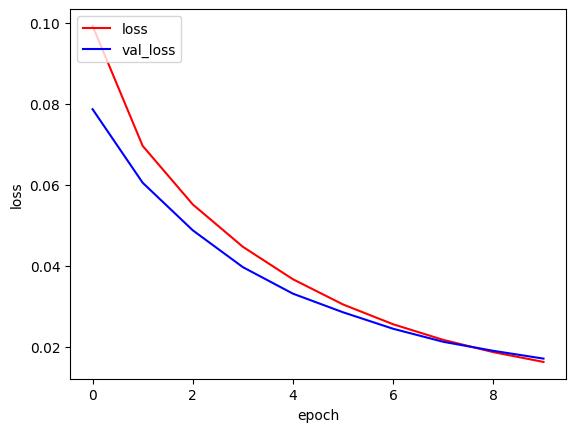

In [24]:
# 그래프 출력
import matplotlib.pyplot as plt
# 과정 살펴보기
plt.plot(hist.history['loss'], 'r', label = 'loss')
plt.plot(hist.history['val_loss'], 'b', label = 'val_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

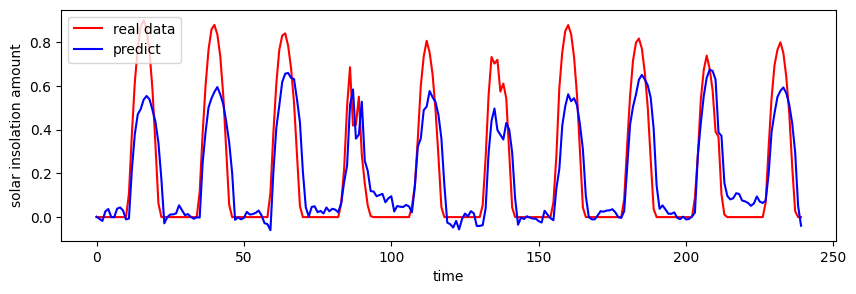

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 3))
plt.plot(y_test[0 : 240], 'r', label = 'real data')   # 실제값 출력
plt.plot(predict[00 : 240], 'b', label = 'predict')    # 예측값 출력
plt.xlabel("time")
plt.ylabel("solar insolation amount")
plt.legend(loc='upper left')
plt.show()

1. DNN 모델로 예측하기

In [26]:
# 모델 만들기
model = Sequential()
model.add(Dense(32, input_dim = 8, activation='relu'))
model.add(Dense(32, activation='relu'))
#model.add(Dense(32, activation='relu'))
#model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 32)                288       
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1377 (5.38 KB)
Trainable params: 1377 (5.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
# 모델 학습과정 설정하기
model.compile(loss = 'mse', optimizer = optimizers.SGD(0.001), metrics=['accuracy'])

# 학습 중 오차가 제일 적은 모델 저장 : model.h5
filename = '/content/drive/MyDrive/Colab Notebooks/midterm/data/mokpo.h5'
modelCheckpoint = tf.keras.callbacks.ModelCheckpoint(filename, save_best_only=True)

# 학습중 검증 오차가 3번 상승하면 학습 강제 종료
monitor_val_lose = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 3)

In [28]:
# 모델 학습
hist = model.fit(
x_train, y_train,                               # 입력 / 라벨
epochs = 10, batch_size = 10,                   # 학습 회수 / 10개 샘플마다 학습
validation_data=(x_test, y_test),               # 검증 데이터
callbacks = [monitor_val_lose,modelCheckpoint]  # 저장 및 모니터링
)

Epoch 1/10
2445/2450 [============================>.] - ETA: 0s - loss: 0.0358 - accuracy: 0.4848

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2450/2450 [==============================] - 8s 3ms/step - loss: 0.0358 - accuracy: 0.4849 - val_loss: 0.0228 - val_accuracy: 0.5536
Epoch 2/10
2450/2450 [==============================] - 7s 3ms/step - loss: 0.0164 - accuracy: 0.4849 - val_loss: 0.0138 - val_accuracy: 0.5536
Epoch 3/10
2450/2450 [==============================] - 5s 2ms/step - loss: 0.0115 - accuracy: 0.4849 - val_loss: 0.0114 - val_accuracy: 0.5536
Epoch 4/10
2450/2450 [==============================] - 6s 2ms/step - loss: 0.0093 - accuracy: 0.4849 - val_loss: 0.0102 - val_accuracy: 0.5536
Epoch 5/10
2450/2450 [==============================] - 5s 2ms/step - loss: 0.0081 - accuracy: 0.4849 - val_loss: 0.0095 - val_accuracy: 0.5536
Epoch 6/10
2450/2450 [==============================] - 12s 5ms/step - loss: 0.0074 - accuracy: 0.4849 - val_loss: 0.0091 - val_accuracy: 0.5536
Epoch 7/10
2450/2450 [==============================] - 9s 4ms/step - loss: 0.0070 - accuracy: 0.4849 - val_loss: 0.0088 - val_accuracy: 0.5536
Ep

In [ ]:
model.evaluate(x_test, y_test) # 모델 평가

# 테스트 데이터 입력하여 예측값 구하기
predict = model.predict(x_test)

# 테스트 세트에 대한 평균 절댓값 오차
mae = mean_absolute_error(y_test, predict)
mse = mean_squared_error(y_test, predict)
rmse = mse**0.5
print("MAE  : ", mae)
print("MSE  : ", mse)
print("RMSE : ", rmse)

192/192 [==============================] - 0s 2ms/step
MAE  :  0.06453215758683552
MSE  :  0.00967197863221156
RMSE :  0.09834621818967702


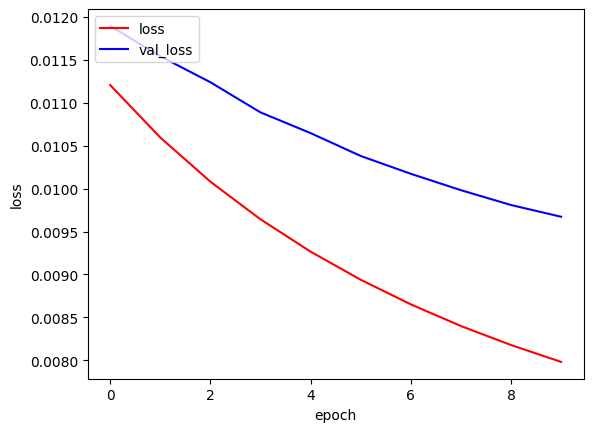

In [ ]:
# 그래프 출력
import matplotlib.pyplot as plt
# 과정 살펴보기
plt.plot(hist.history['loss'], 'r', label = 'loss')
plt.plot(hist.history['val_loss'], 'b', label = 'val_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

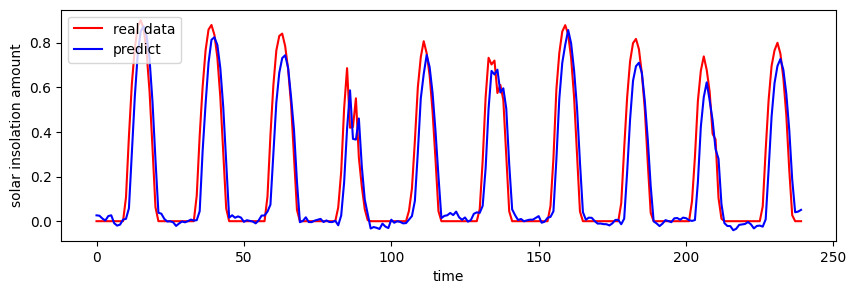

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 3))
plt.plot(y_test[0 : 240], 'r', label = 'real data')   # 실제값 출력
plt.plot(predict[00 : 240], 'b', label = 'predict')    # 예측값 출력
plt.xlabel("time")
plt.ylabel("solar insolation amount")
plt.legend(loc='upper left')
plt.show()